# 🚀 Gradient Boosted Regression Trees (GBRT)

## 📖 What Is GBRT?

**Gradient Boosted Regression Trees** are an ensemble method that builds a model **sequentially**, where each new tree corrects the errors of the previous ones.

---

### 🔍 Key Ideas

- Unlike Random Forests (which average trees), **Boosting adds trees** in sequence.
- Each tree is fit to the **residuals** (errors) of the previous ensemble.
- Gradient descent is used to minimize a loss function (usually squared error for regression).

---

### Implementation
## 🚀 How Gradient Boosting Works (Regression)

Suppose we want to predict $ y $ from $ x $ using **squared error loss**. Gradient Boosting builds a model incrementally by fitting decision trees to the residuals of previous predictions.


### ✅ Step-by-Step Breakdown

#### 1. Initial Model (Stage 0)
Start with a constant prediction, typically the mean of the target:

$$
F_0(x) = \bar{y}
$$


#### 2. Stage $ m $
At iteration $ m $, compute residuals from the current model:

$$
r_i^{(m)} = y_i - F_{m-1}(x_i)
$$

Fit a new regression tree $ h_m(x) $ to the residuals.


#### 3. Update the Prediction

$$
F_m(x) = F_{m-1}(x) + \eta \cdot h_m(x)
$$

Where:
- $ \eta $ is the **learning rate** (e.g., 0.1)
- $ h_m(x) $ is the prediction from the new tree


### 📦 Final Prediction After All Stages

After $ M $ boosting iterations:

$$
F_M(x) = F_0(x) + \eta \cdot \sum_{m=1}^M h_m(x)
$$




### ⚙️ Key Hyperparameters

| Parameter | Description |
|-----------|-------------|
| `n_estimators` | Number of boosting rounds (trees) |
| `learning_rate` | Shrinks contribution of each tree |
| `max_depth` | Depth of each tree |
| `subsample` | Fraction of samples used per tree (stochastic gradient boosting) |

---

### 🧪 Simulated Data Example


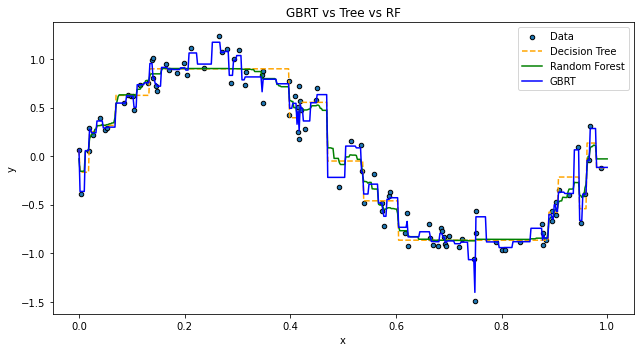

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Simulated data
np.random.seed(1)
X = np.sort(np.random.rand(100, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.2, size=100)
X_plot = np.linspace(0, 1, 500).reshape(-1, 1)

# Fit models
tree = DecisionTreeRegressor(max_depth=4).fit(X, y)
forest = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=1).fit(X, y)
gbrt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=1).fit(X, y)

# Predict
y_tree = tree.predict(X_plot)
y_forest = forest.predict(X_plot)
y_gbrt = gbrt.predict(X_plot)

# Plot
plt.figure(figsize=(9, 5))
plt.scatter(X, y, s=20, edgecolor="k", label="Data")
plt.plot(X_plot, y_tree, "--", label="Decision Tree", color="orange")
plt.plot(X_plot, y_forest, label="Random Forest", color="green")
plt.plot(X_plot, y_gbrt, label="GBRT", color="blue")
plt.title("GBRT vs Tree vs RF")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

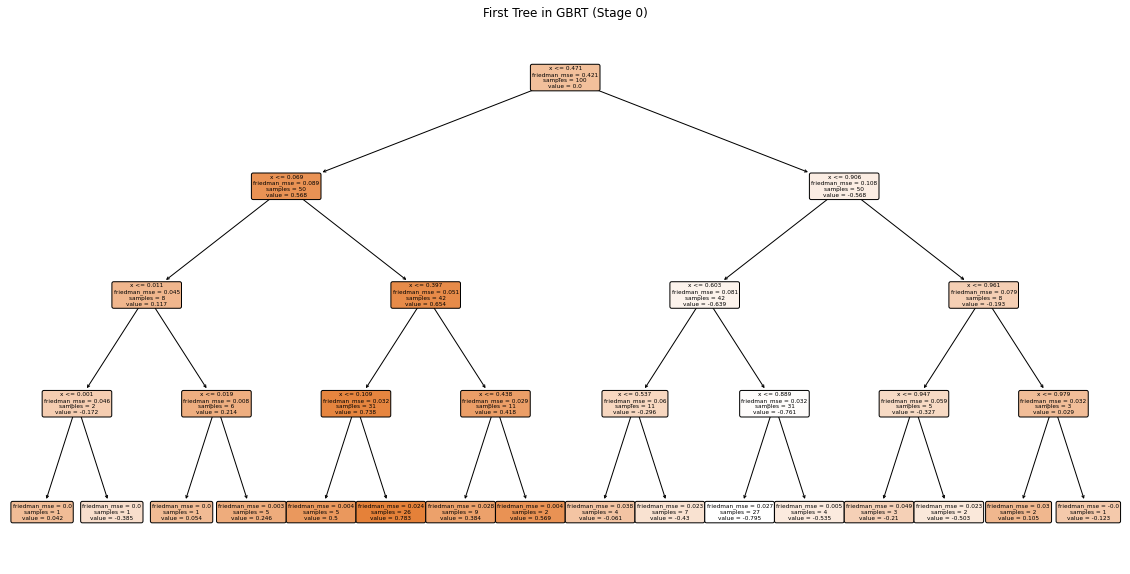

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the 1st tree (stage 0) in the ensemble
plt.figure(figsize=(20, 10))
plot_tree(gbrt.estimators_[1, 0],  # [n_estimators, 1 output] shape
             feature_names=["x"],
          filled=True,
          rounded=True,
          label='all',
          impurity=True)
plt.title("First Tree in GBRT (Stage 0)")
plt.show()

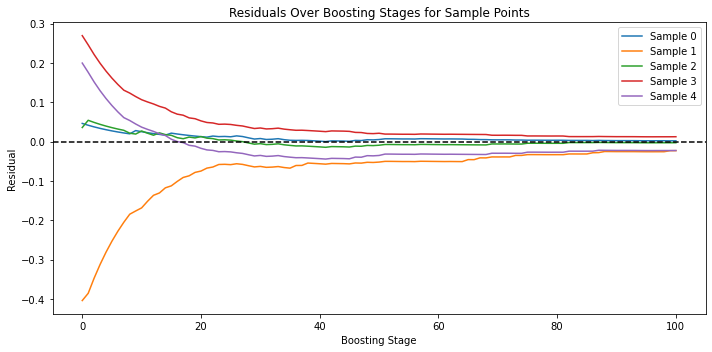

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Initial prediction (F0)
F0 = np.mean(y)
y_pred = np.full_like(y, F0)

# Store residuals at each stage
residuals = [y - y_pred.copy()]

# Iterate over boosting stages
for m in range(len(gbrt.estimators_)):
    y_pred += gbrt.learning_rate * gbrt.estimators_[m, 0].predict(X)
    residuals.append(y - y_pred.copy())  # save residuals

# Convert to array: shape (n_stages+1, n_samples)
residuals = np.array(residuals)

# Plot evolution for a few sample points
plt.figure(figsize=(10, 5))
for i in range(5):  # pick 5 random samples
    plt.plot(range(residuals.shape[0]), residuals[:, i], label=f"Sample {i}")
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Boosting Stage")
plt.ylabel("Residual")
plt.title("Residuals Over Boosting Stages for Sample Points")
plt.legend()
plt.tight_layout()
plt.show()


## 🏠 Real Data: California Housing

R^2: 0.8258
MSE: 0.2272


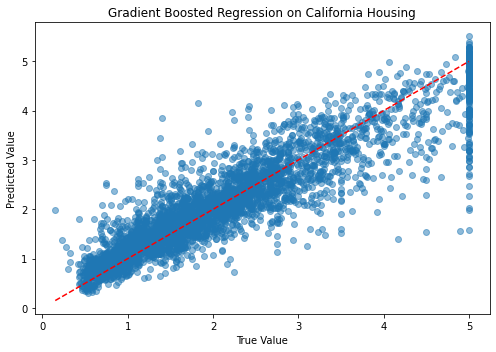

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load data
data = fetch_california_housing()
X_real = data.data
y_real = data.target
feature_names = data.feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=0)

# Fit GBRT
gbrt = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=0)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)

# Evaluation
print(f"R^2: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Plot predicted vs. true
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("Gradient Boosted Regression on California Housing")
plt.tight_layout()
plt.show()

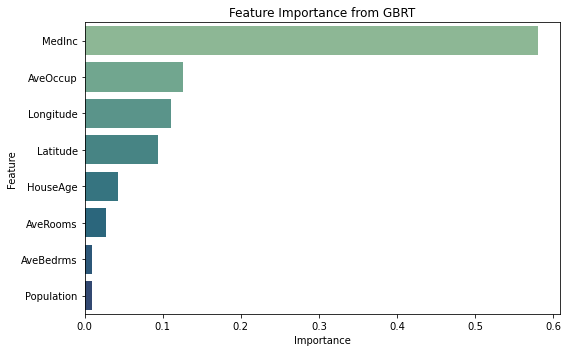

In [7]:
# Plot feature importances
importances = gbrt.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette="crest")
plt.title("Feature Importance from GBRT")
plt.tight_layout()
plt.show()

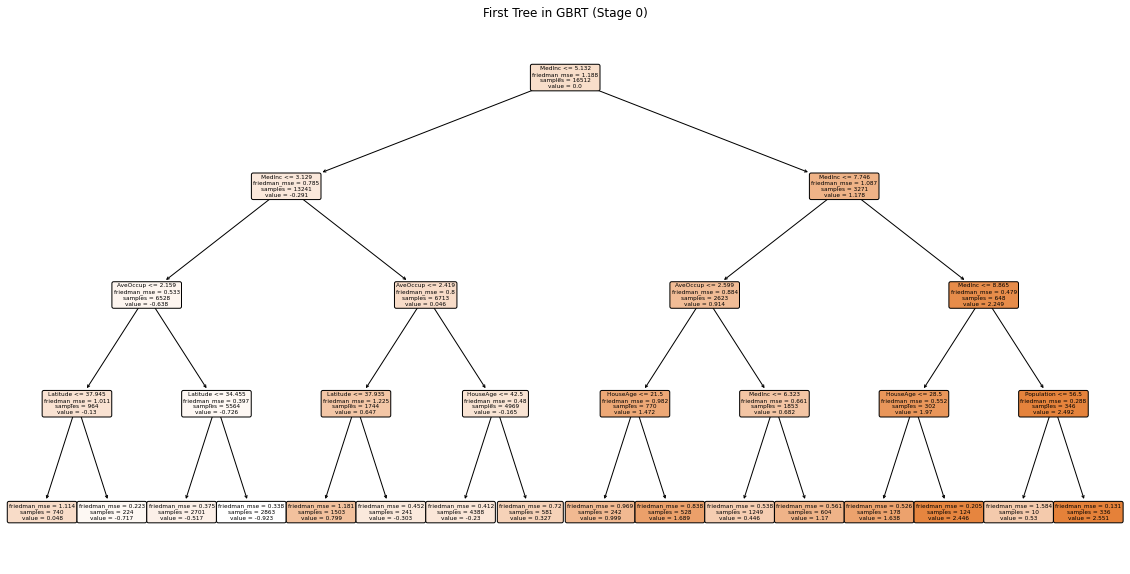

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the 1st tree (stage 0) in the ensemble
plt.figure(figsize=(20, 10))
plot_tree(gbrt.estimators_[1, 0],  # [n_estimators, 1 output] shape
             feature_names=data.feature_names,
          filled=True,
          rounded=True,
          label='all',
          impurity=True)
plt.title("First Tree in GBRT (Stage 0)")
plt.show()

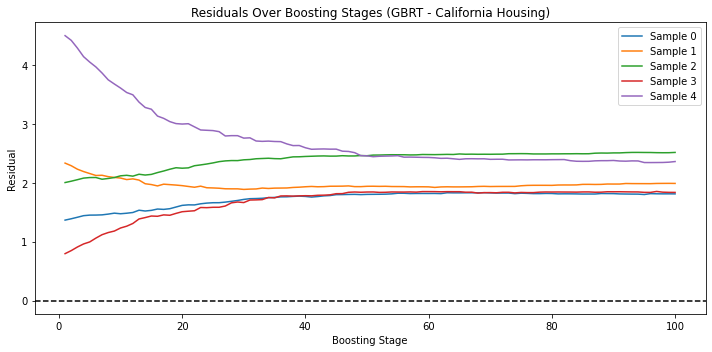

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Load data
data = fetch_california_housing()
X = data.data
y = data.target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Gradient Boosting
gbrt = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=0
)
gbrt.fit(X_train_scaled, y_train)

# Track residuals on test set
y_pred = np.zeros_like(y_test)
residuals = []

for m in range(gbrt.n_estimators_):
    pred_m = gbrt.learning_rate * gbrt.estimators_[m, 0].predict(X_test_scaled)
    y_pred += pred_m
    residuals.append(y_test - y_pred)

residuals = np.array(residuals)  # shape: (n_stages, n_samples)

# Plot residuals for a few samples
plt.figure(figsize=(10, 5))
for i in range(5):  # visualize 5 samples
    plt.plot(range(1, gbrt.n_estimators_ + 1), residuals[:, i], label=f"Sample {i}")
plt.axhline(0, linestyle="--", color="black")
plt.xlabel("Boosting Stage")
plt.ylabel("Residual")
plt.title("Residuals Over Boosting Stages (GBRT - California Housing)")
plt.legend()
plt.tight_layout()
plt.show()